In [2]:
%matplotlib inline
import sys
sys.path.append("../")
from utils.dataset import SerializationDataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
import tensorflow as tf

Using TensorFlow backend.


In [3]:
class DataGenerator(keras.utils.Sequence):
    "Generates Text Recognition Dataset for Keras"

    def __init__(self, dataset, batch_size=32, shuffle=True):
        "Initialization"
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.num_classes = self.dataset.labels.max() + 1  # With Blank
        self.max_length = self.dataset.digit_range[-1] - 1
        self.on_epoch_end()

    def __len__(self):
        "Denotes the number of batches per epoch"
        return len(self.dataset) // self.batch_size

    def __getitem__(self, index):
        "Generator one batch of dataset"
        images, labels, _ = self.dataset[self.batch_size * index:
                                         self.batch_size * (index + 1)]
        # Add Channel axis (batch, width, height) -> (batch, width, height, 1)
        batch_images = images[..., np.newaxis]

        # label sequence
        batch_labels = np.ones([self.batch_size, self.max_length], np.int32)
        batch_labels *= -1  # EOS Token value : -1
        for idx, label in enumerate(labels):
            batch_labels[idx, :len(label)] = label

        return batch_images, batch_labels

    def on_epoch_end(self):
        "Updates indexes after each epoch"
        if self.shuffle:
            self.dataset.shuffle()

In [4]:
val_set = SerializationDataset('mnist','validation')

gen = DataGenerator(val_set)
batch_images, batch_labels = gen[0]

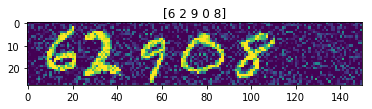

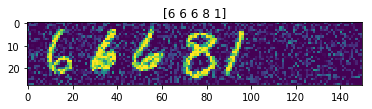

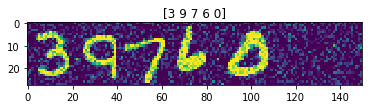

In [6]:
for image, label in zip(batch_images[:3], batch_labels[:3]):
    plt.title(label)
    plt.imshow(image[:,:,0])
    plt.show()